## Goal of the notebook

In this notebook I will be using countvectorized dataframe, then I will be selecting 100 top features by SelectKBest( ) and use them further to model. I will be running two models here:

- RandomForestClassifier( )
- LogisticRegression( )


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,KFold,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                            confusion_matrix, 
                            classification_report,ConfusionMatrixDisplay,
                            plot_confusion_matrix)

from sklearn.linear_model import LogisticRegression 


np.random.seed(73) #to maintain consistency in reproducibility of same numbers across


In [2]:
df=pd.read_csv('Vectorised_Data.csv')#importing vectorised dataframe 
df.head()

,is_sarcastic,num_words,num_unique_words,num_chars,num_stopwords,num_punctuations,mean_word_len,abort,abus,accept,...,INTJ_proportion,X_proportion,AUX_proportion,CCONJ_proportion,PART_proportion,PROPN_proportion,PUNCT_proportion,ADJ_proportion,SCONJ_proportion,VERB_proportion
0,0.0,12.0,12.0,78.0,2.0,2.0,5.583333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.400000,0.0,0.100000
1,0.0,14.0,14.0,84.0,6.0,3.0,5.071429,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.625000,0.0,0.125000,0.0,0.000000
2,1.0,14.0,13.0,79.0,4.0,1.0,4.714286,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.111111,0.0,0.222222
3,1.0,13.0,13.0,84.0,5.0,2.0,5.538462,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.111111,0.0,0.333333
4,0.0,11.0,11.0,64.0,3.0,2.0,4.909091,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.428571,0.0,0.000000,0.0,0.142857


In [3]:
df.shape# shape of the data

(26703, 1023)

In [4]:
#checking for nulls
df.isnull().sum()

is_sarcastic        0
num_words           0
num_unique_words    0
num_chars           0
num_stopwords       0
                   ..
PROPN_proportion    0
PUNCT_proportion    0
ADJ_proportion      0
SCONJ_proportion    0
VERB_proportion     0
Length: 1023, dtype: int64

In [5]:
#dropping any nulls
df.dropna(inplace=True)

## train test split

In [6]:
y = df.is_sarcastic
X = df[[cols for cols in df.columns if cols != "is_sarcastic"]]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size = 0.20,stratify=y)
#stratification as dataframe was not balanced

## Standard Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
# initialize
ss = StandardScaler()

# fit on Train
X_train_ss = pd.DataFrame(ss.fit_transform(X_train),
                          columns = X_train.columns,
                          index = X_train.index)

# transform test
X_test_ss = pd.DataFrame(ss.transform(X_test),
                         columns = X_test.columns,
                         index = X_test.index)

## Select KBest

In [10]:
from sklearn.feature_selection import SelectKBest

In [11]:
selector = SelectKBest(k=100)
selector.fit(X_train_ss, y_train)

SelectKBest(k=100)

In [12]:
# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)

In [13]:
#X_train_feat_select->train df created from selected features 
#X_test_feat_select->test df created from selected features 
X_train_feat_select = X_train_ss.iloc[:,cols]
X_test_feat_select = X_test_ss.iloc[:,cols]

In [14]:
#removed_cols-> columns removed after SelectKBest( )
#X_train_feat_removed-> df created from X_train containing columns removed after SelectKBest( )
#X_test_feat_removed->df created from X_test containing columns removed after SelectKBest( )
removed_cols = [c for c in X_train_ss.columns if c not in X_train_feat_select.columns]
X_train_feat_removed = X_train_ss.loc[:,removed_cols]
X_test_feat_removed = X_test_ss.loc[:,removed_cols]

In [15]:
# Selected Columns
X_train_feat_select.columns

Index(['num_words', 'num_unique_words', 'num_chars', 'num_stopwords',
       'num_punctuations', 'mean_word_len', 'alreadi', 'america', 'announc',
       'answer', 'artist', 'assur', 'biden', 'card', 'case', 'christian',
       'commerci', 'communiti', 'conserv', 'consid', 'cost', 'court', 'cowork',
       'critic', 'deep', 'documentari', 'dog', 'dress', 'drink', 'drunk',
       'educ', 'excit', 'eye', 'fear', 'financi', 'fuck', 'guy', 'happi',
       'harass', 'heart', 'honor', 'increas', 'incred', 'interview',
       'introduc new', 'journalist', 'kick', 'law', 'loss', 'magazin', 'magic',
       'manag', 'muslim', 'nation', 'netflix', 'number', 'olymp', 'order',
       'paper', 'perform', 'player', 'poor', 'pound', 'presid', 'pretti',
       'prevent', 'price', 'primari', 'progress', 'race', 'ralli', 'recommend',
       'refus', 'relat', 'repeal', 'road', 'robert', 'rubio', 'sign', 'sinc',
       'sleep', 'someon', 'space', 'spend', 'straight', 'street', 'stun',
       'sudden', 'sup

## Models

### Random Forest

In [1]:
def rfscore2(X_train, X_test, y_train, y_test,n_estimators,max_depth):
   
    '''Gridsearching RandomForest'''
   
    y_test= y_test.values.ravel()
    y_train = y_train.values.ravel()
    rf_params = {
             'n_estimators':n_estimators,
             'max_depth':max_depth}   # parameters for grid search
    
    rf_gs = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, verbose=1, n_jobs=-1)
    rf_gs.fit(X_train,y_train) # training the random forest with all possible parameters
    print('GridSearch results')
    print('The best parameters on the training data are:\n',rf_gs.best_params_) # printing the best parameters
    max_depth_best = rf_gs.best_params_['max_depth']      # getting the best max_depth
    n_estimators_best = rf_gs.best_params_['n_estimators']  # getting the best n_estimators
    print("best max_depth:",max_depth_best)
    print("best n_estimators:",n_estimators_best)
    best_rf_gs = RandomForestClassifier(max_depth=max_depth_best,n_estimators=n_estimators_best) # instantiate the best model
    
    score(best_rf_gs, 'Random Forest', X_train, y_train)
    
    best_rf_gs.fit(X_train,y_train)  # fitting the best model

    preds = best_rf_gs.predict(X_test)
    print("")
    
    disp = plot_confusion_matrix(best_rf_gs, X_test, y_test)
    disp.figure_.suptitle("Confusion Matrix")
    print("Confusion matrix:\n%s" % disp.confusion_matrix)
    plt.show();
    
    print(classification_report(y_test,preds))
    print(accuracy_score(y_test, preds))

    
    print('Features and their importance:\n')
    feature_importances = pd.Series(best_rf_gs.feature_importances_, index=X_train.columns).sort_values().tail(10)
    print(feature_importances.plot(kind="barh", figsize=(6,6)))
    return

In [2]:
def score(model, name, X, y):
    '''Cross val score for specific model, df and target'''
    cv = StratifiedKFold(n_splits=10,
                         random_state=42,
                         shuffle=True)
    s = cross_val_score(model, X, y, cv=cv,
                        n_jobs=-1)
    print('{} Score: {:.2f} +- {:.3f}'.format(name, 
                                              s.mean(), 
                                              2 * s.std()))

Fitting 5 folds for each of 135 candidates, totalling 675 fits
GridSearch results
The best parameters on the training data are:
 {'max_depth': 21, 'n_estimators': 60}
best max_depth: 21
best n_estimators: 60
Random Forest Score: 0.65 +- 0.017

Confusion Matrix:

[[2395  599]
 [1245 1102]]
              precision    recall  f1-score   support

         0.0       0.66      0.80      0.72      2994
         1.0       0.65      0.47      0.54      2347

    accuracy                           0.65      5341
   macro avg       0.65      0.63      0.63      5341
weighted avg       0.65      0.65      0.64      5341

0.654746302190601
Features and their importance:

AxesSubplot(0.125,0.125;0.775x0.755)


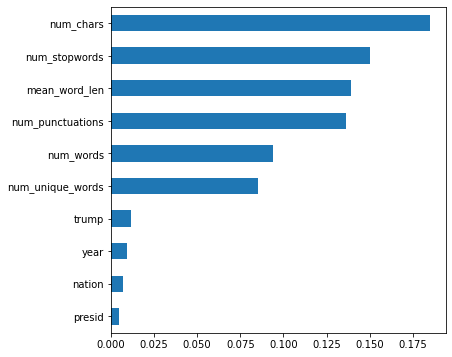

In [20]:
n_estimators = list(range(10,100,10))
max_depth = list(range(1, 30, 2)) 
rfscore2(X_train_feat_select, X_test_feat_select, y_train, y_test,n_estimators,max_depth)

**Observations**:
    
- num_chars, num_stopwords, mean_word_len, num_punctuations are among most relevant features
  with highest values of coefficients.
- The model RandomForestClassifier here is 65% accurate in predicting the target class. 
- This is 9% more accurate than our baseline model with 56% accuracy.
- It was more precise in predicting the "0" class(non-sarcastic), with a precision of 66%.
  The precision for predicting "No" is 65%.


### Logistic Regression

In [21]:
logreg_params = {'penalty': ['l1', 'l2'], 
                 'solver': ['liblinear', 'saga'],
                }

logreg_gridsearch = GridSearchCV(LogisticRegression(), 
                                 logreg_params, 
                                 cv=5, 
                                 n_jobs=-1)

logreg_gridsearch.fit(X_train_feat_select, y_train.values.ravel())

print(logreg_gridsearch.best_estimator_)
print(logreg_gridsearch.best_params_)

print('\nBaseline: 56%')

print('\nBest Score:', round(logreg_gridsearch.best_score_, 4))
print('Test Score:', round(logreg_gridsearch.score(X_test_feat_select, y_test.values.ravel()), 4))

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:35

LogisticRegression(solver='saga')
{'penalty': 'l2', 'solver': 'saga'}

Baseline: 56%

Best Score: 0.6171
Test Score: 0.6216


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [22]:
logreg = LogisticRegression(max_iter=500, 
                            penalty='l2', 
                            solver='saga')

logreg.fit(X_train, y_train.values.ravel())

train_scores = cross_val_score(logreg, X_train_feat_select, y_train.values.ravel())
print('Baseline: 56%\n')

print('Train scores:', train_scores)
print('Mean:', round(train_scores.mean(), 3))
print('Stdev:', round(2 * train_scores.std(), 3), '\n')


/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:35

Baseline: 56%

Train scores: [0.62508776 0.62344957 0.61657303 0.60884831 0.61985019]
Mean: 0.619
Stdev: 0.012 

Test scores: [0.59681946 0.64138577 0.61797753 0.63576779 0.6329588 ]
Mean: 0.625
Stdev: 0.032 



/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [24]:
### Coefficient Interpretation
logreg_coefs_0 = pd.DataFrame(list(zip(X_train_feat_select.columns, np.expm1(logreg.coef_[0]))), 
                           columns=['features', 'coef'])

logreg_coefs_0['abs'] = abs(logreg_coefs_0['coef'])

logreg_coefs_0.sort_values('abs', ascending=False).head(10)

,features,coef,abs
4,num_punctuations,-0.284690,0.284690
1008,NOUN_proportion,-0.250276,0.250276
3,num_stopwords,-0.240278,0.240278
142,case,-0.201521,0.201521
38,america,-0.194371,0.194371
265,dog,0.186170,0.186170
1017,PROPN_proportion,-0.185788,0.185788
43,announc,0.184189,0.184189
674,pretti,0.175026,0.175026
585,muslim,-0.171703,0.171703


In [1]:
print('Features and their importance for Logistic regression:\n')
(logreg_coefs_0.sort_values('abs', ascending=False)).plot(kind="barh", figsize=(6,6))

Features and their importance for Logistic regression:



NameError: name 'logreg_coefs_0' is not defined

In [ ]:
print("Confusion Matrix")
print(confusion_matrix(y_test,preds))
print("Classification Report")
print(classification_report(y_test,preds))
print("Accuracy Score")
print(accuracy_score(y_test, preds))

In [ ]:
conmat = np.array(confusion_matrix(y_test, 
                                   logreg.predict(X_test), 
                                   labels=[0, 1, 2]))

print(classification_report(y_test,
                            logreg.predict(X_test), 
                            target_names=['No', "Don't know", 'Yes']))

matrix_display = ConfusionMatrixDisplay(confusion_matrix=conmat, 
                                        display_labels=logreg.classes_)
matrix_display.plot()

figure = plt.gcf()
figure.set_size_inches(10, 10)
;

**Observations**:
    
- The features with the largest absolute coefficients are mostly the same across the two 
  models.
- num_punctuations,NOUN_proportion, num_stopwords are among most relevant features with
  highest values of coefficients.
- Accuracy on test data is 62.5% which is 6.5% higher than baseline
- the best solver for logistic regression model here is 'saga'

## Conclusion for this notebook :

- RandomForest performed better than Logistic regression in terms of accuracy
- The models are not really able to capture the context of the text, no bigrams or trigrams are coming as really relevant which leads to low accuracy scores since sarcasm detection is very subjective.

## Way Forward

- I want to see whether particular linear combinations of certain words do well 
  for detecting sarcasm or not. For that I want to try PCA on all columns, and use   the resulting dataframe to model again. 